In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import scale, minmax_scale, robust_scale
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns

from statsmodels.formula.api import ols
from statsmodels.api import qqplot, add_constant
import statsmodels.formula.api as smf
from statsmodels.tools.eval_measures import rmse
%matplotlib inline
# %matplotlib tk

from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

from sklearn.tree import export_graphviz
import graphviz
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import statsmodels.api as sm
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from statsmodels.api import Logit

# 유방암 결과 분류 - 의사결정 나무 모델

In [2]:
df_raw = pd.read_csv("유방암.csv", engine = "python")
df_raw.describe()

,diagnosis,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,0.372583,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,0.483918,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,0.000000,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,0.000000,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,0.000000,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,1.000000,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,1.000000,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


In [3]:
df_raw.isnull().sum(axis = 0)

diagnosis                  0
mean radius                0
mean texture               0
mean perimeter             0
mean area                  0
mean smoothness            0
mean compactness           0
mean concavity             0
mean concave points        0
mean symmetry              0
mean fractal dimension     0
radius error               0
texture error              0
perimeter error            0
area error                 0
smoothness error           0
compactness error          0
concavity error            0
concave points error       0
symmetry error             0
fractal dimension error    0
worst radius               0
worst texture              0
worst perimeter            0
worst area                 0
worst smoothness           0
worst compactness          0
worst concavity            0
worst concave points       0
worst symmetry             0
worst fractal dimension    0
dtype: int64

결측치를 확인해보았으나 존재하지 않았습니다.

In [6]:
df_raw_y = df_raw["diagnosis"]
df_raw_x = df_raw.drop("diagnosis", axis = 1, inplace = False)
df_train_x, df_test_x, df_train_y, df_test_y = train_test_split(df_raw_x, df_raw_y, test_size = 0.3, random_state = 1234)
df_train_x, df_validation_x, df_train_y, df_validation_y = train_test_split(df_train_x, df_train_y, test_size = 0.428, random_state = 1234)

print("train data X size : {}".format(df_train_x.shape))
print("train data Y size : {}".format(df_train_y.shape))

print("test data X size : {}".format(df_test_x.shape))
print("test data Y size : {}".format(df_test_y.shape))

print("validation data X size : {}".format(df_validation_x.shape))
print("validation data Y size : {}".format(df_validation_y.shape))

train data X size : (227, 30)
train data Y size : (227,)
test data X size : (171, 30)
test data Y size : (171,)
validation data X size : (171, 30)
validation data Y size : (171,)


In [7]:
tree_uncustomized = DecisionTreeClassifier(random_state=1234)
tree_uncustomized.fit(df_train_x,df_train_y)
print("Score on training set:{:.3f}".format(tree_uncustomized.score(df_train_x, df_train_y)))
print("Score on test set:{:.3f}".format(tree_uncustomized.score(df_test_x, df_test_y)))

Score on training set:1.000
Score on test set:0.895


의사결정 모델을 만들었습니다. 89.5%의 정확도를 가지고 있는데 하이퍼 파라미터를 조절해서 더 좋은 성능으로 만들어 보겠습니다

In [8]:
tree_uncustomized

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=1234, splitter='best')

<h5> parameter - 최대 깊이 조정

In [9]:
train_accuracy = []
test_accuracy = []
para_depth = [depth for depth in range(1,20)]
# split 12이하로 해보기
for v_max_depth in para_depth:
    tree = DecisionTreeClassifier(random_state=1234,max_depth=v_max_depth)
    tree.fit(df_train_x,df_train_y)
    train_accuracy.append(tree.score(df_train_x,df_train_y))
    test_accuracy.append(tree.score(df_validation_x,df_validation_y))
    
df_accuracy_depth = pd.DataFrame()
df_accuracy_depth["Depth"] = para_depth
df_accuracy_depth["TrainAccuracy"] = train_accuracy
df_accuracy_depth["TestAccuracy"] = test_accuracy
df_accuracy_depth.round(3)



,Depth,TrainAccuracy,TestAccuracy
0,1,0.943,0.912
1,2,0.982,0.942
2,3,0.982,0.942
3,4,0.996,0.936
4,5,1.000,0.936
5,6,1.000,0.936
6,7,1.000,0.936
7,8,1.000,0.936
8,9,1.000,0.936
9,10,1.000,0.936


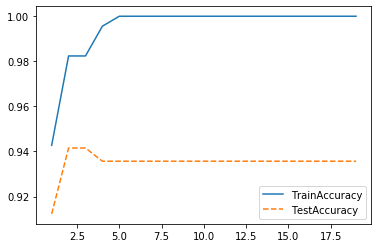

In [10]:
plt.plot(para_depth, train_accuracy, linestyle = "-", label="TrainAccuracy")
plt.plot(para_depth, test_accuracy, linestyle = "--", label="TestAccuracy")
plt.legend()

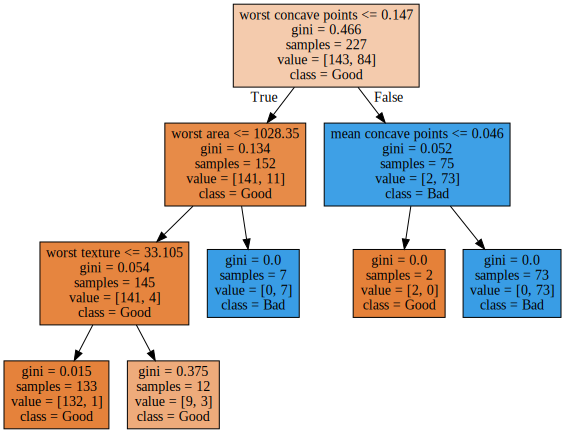

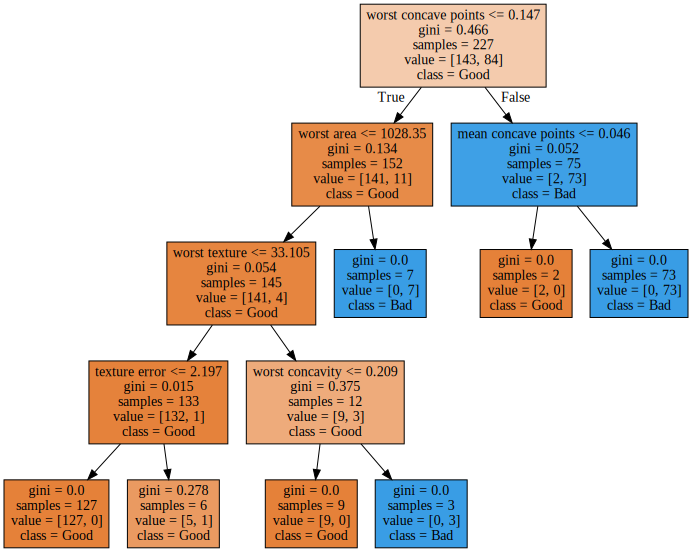

In [11]:
v_feature_name = df_train_x.columns
tree_low = DecisionTreeClassifier(random_state = 1234, max_depth = 3) #max_depth=6
tree_low.fit(df_train_x, df_train_y)

export_graphviz(tree_low, out_file="tree_low.dot", class_names = ["Good","Bad"],feature_names=v_feature_name, impurity=True, filled=True)
with open("tree_low.dot") as f:
    dot_graph = f.read()
display(graphviz.Source(dot_graph))
###################################################################
v_feature_name = df_train_x.columns
tree_high = DecisionTreeClassifier(random_state = 1234, max_depth = 4) #max_depth=6
tree_high.fit(df_train_x, df_train_y)

export_graphviz(tree_high, out_file="tree_high.dot", class_names = ["Good","Bad"],feature_names=v_feature_name, impurity=True, filled=True)
with open("tree_high.dot") as f:
    dot_graph = f.read()
display(graphviz.Source(dot_graph))


<H5> parameter - 분리노드의 최소 자료수 조정

In [12]:
train_accuracy = []
test_accuracy = []
para_split = [n_split * 10 for n_split in range(1,11)]

for v_min_samples_split in para_split:
    tree = DecisionTreeClassifier(random_state=1234, max_depth=3, min_samples_split=v_min_samples_split)
    tree.fit(df_train_x,df_train_y)
    train_accuracy.append(tree.score(df_train_x,df_train_y))
    test_accuracy.append(tree.score(df_validation_x,df_validation_y))
    
df_accuracy_split = pd.DataFrame()
df_accuracy_split["MinSamplesSplit"] = para_split
df_accuracy_split["TrainAccuracy"] = train_accuracy
df_accuracy_split["TestAccuracy"] = test_accuracy
df_accuracy_split.round(3)


,MinSamplesSplit,TrainAccuracy,TestAccuracy
0,10,0.982,0.942
1,20,0.982,0.942
2,30,0.982,0.942
3,40,0.982,0.942
4,50,0.982,0.942
5,60,0.982,0.942
6,70,0.982,0.942
7,80,0.974,0.936
8,90,0.974,0.936
9,100,0.974,0.936


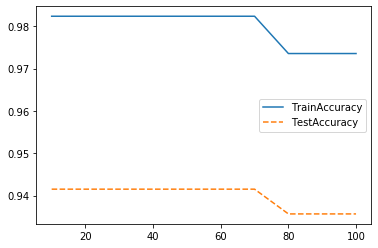

In [13]:
plt.plot(para_split, train_accuracy, linestyle = "-", label="TrainAccuracy")
plt.plot(para_split, test_accuracy, linestyle = "--", label="TestAccuracy")
plt.legend()

In [14]:
train_accuracy = []
test_accuracy = []
para_split = [n_split for n_split in range(10,21)]

for v_min_samples_split in para_split:
    tree = DecisionTreeClassifier(random_state=1234, max_depth=3, min_samples_split=v_min_samples_split)
    tree.fit(df_train_x,df_train_y)
    train_accuracy.append(tree.score(df_train_x,df_train_y))
    test_accuracy.append(tree.score(df_validation_x,df_validation_y))
    
df_accuracy_split = pd.DataFrame()
df_accuracy_split["MinSamplesSplit"] = para_split
df_accuracy_split["TrainAccuracy"] = train_accuracy
df_accuracy_split["TestAccuracy"] = test_accuracy
df_accuracy_split.round(3)


,MinSamplesSplit,TrainAccuracy,TestAccuracy
0,10,0.982,0.942
1,11,0.982,0.942
2,12,0.982,0.942
3,13,0.982,0.942
4,14,0.982,0.942
5,15,0.982,0.942
6,16,0.982,0.942
7,17,0.982,0.942
8,18,0.982,0.942
9,19,0.982,0.942


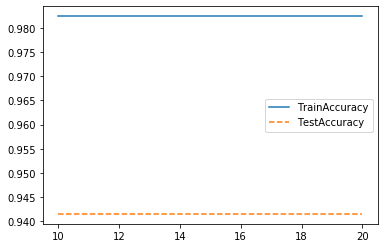

In [15]:
plt.plot(para_split, train_accuracy, linestyle = "-", label="TrainAccuracy")
plt.plot(para_split, test_accuracy, linestyle = "--", label="TestAccuracy")
plt.legend()

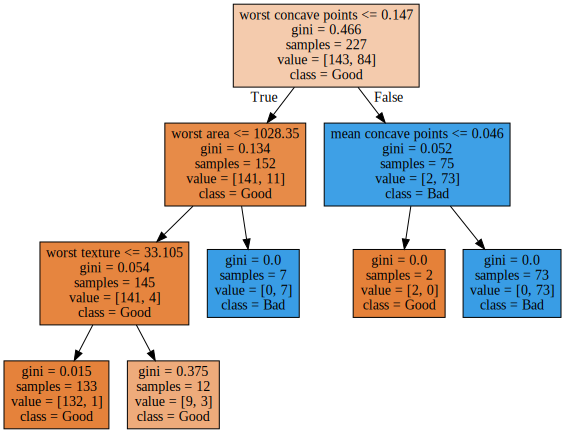

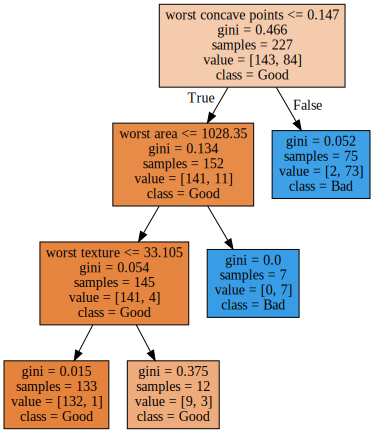

In [16]:
v_feature_name = df_train_x.columns
tree_low = DecisionTreeClassifier(random_state = 1234, max_depth = 3,min_samples_split=20) #max_depth=6
tree_low.fit(df_train_x, df_train_y)

export_graphviz(tree_low, out_file="tree_low.dot", class_names = ["Good","Bad"],feature_names=v_feature_name, impurity=True, filled=True)
with open("tree_low.dot") as f:
    dot_graph = f.read()
display(graphviz.Source(dot_graph))
###################################################################
v_feature_name = df_train_x.columns
tree_high = DecisionTreeClassifier(random_state = 1234, max_depth = 3,min_samples_split=80) #max_depth=6
tree_high.fit(df_train_x, df_train_y)

export_graphviz(tree_high, out_file="tree_high.dot", class_names = ["Good","Bad"],feature_names=v_feature_name, impurity=True, filled=True)
with open("tree_high.dot") as f:
    dot_graph = f.read()
display(graphviz.Source(dot_graph))

<H5> parameter - 리프의 최소 자료 수 조정

In [17]:
train_accuracy = []
test_accuracy = []
para_leaf = [n_leaf for n_leaf in range(1,21)]

for v_min_samples_leaf in para_leaf:
    tree = DecisionTreeClassifier(random_state=1234, max_depth=3, min_samples_split=20,min_samples_leaf=v_min_samples_leaf)
    tree.fit(df_train_x,df_train_y)
    train_accuracy.append(tree.score(df_train_x,df_train_y))
    test_accuracy.append(tree.score(df_validation_x,df_validation_y))
    
df_accuracy_leaf = pd.DataFrame()
df_accuracy_leaf["MinSamplesLeaf"] = para_leaf
df_accuracy_leaf["TrainAccuracy"] = train_accuracy
df_accuracy_leaf["TestAccuracy"] = test_accuracy
df_accuracy_leaf.round(3)

,MinSamplesLeaf,TrainAccuracy,TestAccuracy
0,1,0.982,0.942
1,2,0.982,0.942
2,3,0.978,0.930
3,4,0.974,0.918
4,5,0.974,0.936
5,6,0.974,0.936
6,7,0.974,0.936
7,8,0.969,0.930
8,9,0.969,0.930
9,10,0.969,0.930


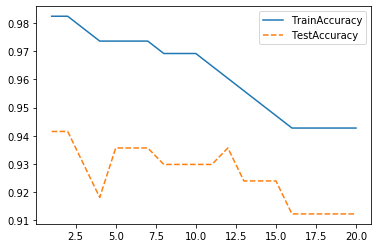

In [21]:
plt.plot(para_leaf, train_accuracy, linestyle = "-", label="TrainAccuracy")
plt.plot(para_leaf, test_accuracy, linestyle = "--", label="TestAccuracy")
plt.legend()

<H5> 최종 모델 선정

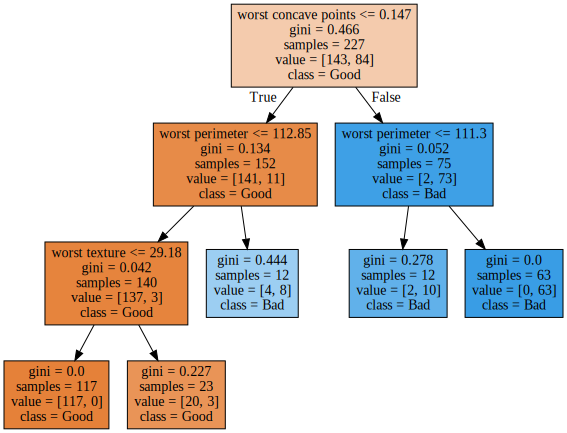

In [22]:
# v_feature_name = df_train_x.columns
tree_final = DecisionTreeClassifier(random_state=1234, max_depth=3, min_samples_split=20,min_samples_leaf=12)
tree_final.fit(df_train_x, df_train_y)

export_graphviz(tree_final, out_file="tree_final.dot", class_names = ["Good","Bad"],feature_names=v_feature_name, impurity=True, filled=True)
with open("tree_final.dot") as f:
    dot_graph = f.read()
display(graphviz.Source(dot_graph))

<H5> 최종 모델 평가

In [23]:
y_pred = tree_final.predict(df_test_x)
print("Accuracy: {0:.3f}\n".format(tree_final.score(df_test_x,df_test_y)))
print("Confusion matrix: \n{}".format(confusion_matrix(df_test_y,y_pred)))

Accuracy: 0.918

Confusion matrix: 
[[99  6]
 [ 8 58]]


하이퍼 파라미터 조정을 통해 정확도가 89.5%보다 좋아진 91.8%가 되었습니다.

이는 91.8%의 정확도로 환자가 유방암인지 아닌지 예측할 수 있다는 말과 같습니다.

confusion matrix는 다음과 같습니다

[[99  6]

[8   58]]

confusion matrix의 해석은 다음과 같습니다.

실제로 악성(0)일때 악성이라고 판단한 갯수가 99개이고 악성인데 양성(1)이라고 판단한 갯수가 6개입니다.

또, 실제 양성인데 악성이라 판단한 갯수가 8, 양성일때 양성이라고 판단한 갯수가 58입니다.

confusion matrix를 통해 계산한 정확도는 다음과 같습니다.

(99+58)/(99+6+8+58) = 0.918 이며 이는 score함수를 통해 계산한 정확도와 같습니다.

<h5> 설명변수의 중요도 확인

In [24]:
df_importance = pd.DataFrame()
df_importance["Feature"] = v_feature_name
df_importance["Importance"] = tree_final.feature_importances_

df_importance.sort_values("Importance", ascending = False, inplace = True)
df_importance.round(3)

,Feature,Importance
27,worst concave points,0.887
22,worst perimeter,0.106
21,worst texture,0.007
0,mean radius,0.000
1,mean texture,0.000
28,worst symmetry,0.000
26,worst concavity,0.000
25,worst compactness,0.000
24,worst smoothness,0.000
23,worst area,0.000


Text(0, 0.5, 'Variable')

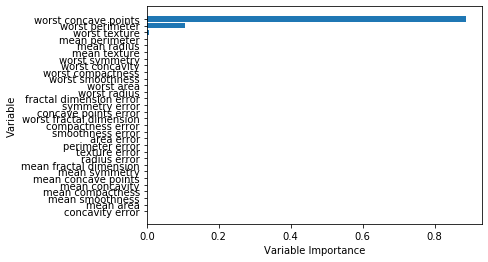

In [25]:
df_importance.sort_values("Importance", ascending = True, inplace = True)
coordinates = range(len(df_importance))
plt.barh(y = coordinates, width = df_importance["Importance"])
plt.yticks(coordinates, df_importance["Feature"])
plt.xlabel("Variable Importance")
plt.ylabel("Variable")

의사결정 모델에서 변수 중요도는 worst concave points가 가장 크고 다음으로는 worst perimeter와 worst texture가 있습니다.

그 이외의 변수들의 중요도는 거의 없습니다.

이는 의사결정 모델에서 worst concave points 변수가 루트 노드에 등장할 확률이 크다는 의미이기도 합니다.

# 유방암 분류 모델 - 랜덤 포레스트

In [52]:
df_raw = pd.read_csv("유방암.csv", engine = "python")
df_raw.describe()

,diagnosis,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,0.372583,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,0.483918,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,0.000000,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,0.000000,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,0.000000,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,1.000000,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,1.000000,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


In [53]:
df_raw.isnull().sum(axis = 0)

diagnosis                  0
mean radius                0
mean texture               0
mean perimeter             0
mean area                  0
mean smoothness            0
mean compactness           0
mean concavity             0
mean concave points        0
mean symmetry              0
mean fractal dimension     0
radius error               0
texture error              0
perimeter error            0
area error                 0
smoothness error           0
compactness error          0
concavity error            0
concave points error       0
symmetry error             0
fractal dimension error    0
worst radius               0
worst texture              0
worst perimeter            0
worst area                 0
worst smoothness           0
worst compactness          0
worst concavity            0
worst concave points       0
worst symmetry             0
worst fractal dimension    0
dtype: int64

In [54]:
df_raw_y = df_raw["diagnosis"]
df_raw_x = df_raw.drop("diagnosis", axis = 1, inplace = False)
df_train_x, df_test_x, df_train_y, df_test_y = train_test_split(df_raw_x, df_raw_y, test_size = 0.3, random_state = 1234)
df_train_x, df_validation_x, df_train_y, df_validation_y = train_test_split(df_train_x, df_train_y, test_size = 0.428, random_state = 1234)

print("train data X size : {}".format(df_train_x.shape))
print("train data Y size : {}".format(df_train_y.shape))

print("test data X size : {}".format(df_test_x.shape))
print("test data Y size : {}".format(df_test_y.shape))

print("validation data X size : {}".format(df_validation_x.shape))
print("validation data Y size : {}".format(df_validation_y.shape))

train data X size : (227, 30)
train data Y size : (227,)
test data X size : (171, 30)
test data Y size : (171,)
validation data X size : (171, 30)
validation data Y size : (171,)


In [55]:
rf = RandomForestClassifier(random_state=1234)
rf.fit(df_train_x,df_train_y)
print("Score on training set:{:.3f}".format(rf.score(df_train_x, df_train_y)))
print("Score on test set:{:.3f}".format(rf.score(df_test_x, df_test_y)))

Score on training set:1.000
Score on test set:0.924


랜덤포레스트 모델을 만들었습니다. 92.4%의 정확도를 가지고 있는데 하이퍼 파라미터를 조절해서 더 좋은 성능으로 만들어 보겠습니다

In [56]:
rf

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=1234,
                       verbose=0, warm_start=False)

<h5> parameter - 트리 수 조정

In [57]:
train_accuracy = []
test_accuracy = []
para_n_tree = [n_tree * 10 for n_tree in range(1,16)]

for v_n_estimators in para_n_tree:
    rf = RandomForestClassifier(random_state=1234, n_estimators=v_n_estimators)
    rf.fit(df_train_x,df_train_y)
    train_accuracy.append(rf.score(df_train_x,df_train_y))
    test_accuracy.append(rf.score(df_validation_x,df_validation_y))
    
df_accuracy_n = pd.DataFrame()
df_accuracy_n["n_estimators"] = para_n_tree
df_accuracy_n["TrainAccuracy"] = train_accuracy
df_accuracy_n["TestAccuracy"] = test_accuracy
df_accuracy_n.round(3)

,n_estimators,TrainAccuracy,TestAccuracy
0,10,0.996,0.953
1,20,0.996,0.953
2,30,1.000,0.953
3,40,1.000,0.953
4,50,1.000,0.947
5,60,1.000,0.953
6,70,1.000,0.953
7,80,1.000,0.953
8,90,1.000,0.953
9,100,1.000,0.953


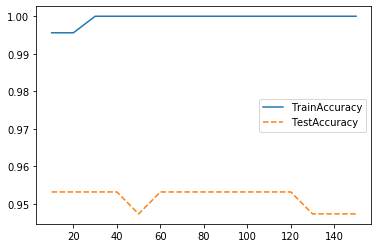

In [59]:
plt.plot(para_n_tree, train_accuracy, linestyle = "-", label="TrainAccuracy")
plt.plot(para_n_tree, test_accuracy, linestyle = "--", label="TestAccuracy")
plt.legend()

In [62]:
train_accuracy = []
test_accuracy = []
para_n_tree = [n_tree for n_tree in range(20,41)]

for v_n_estimators in para_n_tree:
    rf = RandomForestClassifier(random_state=1234, n_estimators=v_n_estimators)
    rf.fit(df_train_x,df_train_y)
    train_accuracy.append(rf.score(df_train_x,df_train_y))
    test_accuracy.append(rf.score(df_validation_x,df_validation_y))
    
df_accuracy_n = pd.DataFrame()
df_accuracy_n["n_estimators"] = para_n_tree
df_accuracy_n["TrainAccuracy"] = train_accuracy
df_accuracy_n["TestAccuracy"] = test_accuracy
df_accuracy_n.round(3)

,n_estimators,TrainAccuracy,TestAccuracy
0,20,0.996,0.953
1,21,0.996,0.953
2,22,0.996,0.953
3,23,0.996,0.953
4,24,0.996,0.953
5,25,0.996,0.953
6,26,0.996,0.953
7,27,0.996,0.953
8,28,0.996,0.953
9,29,1.000,0.953


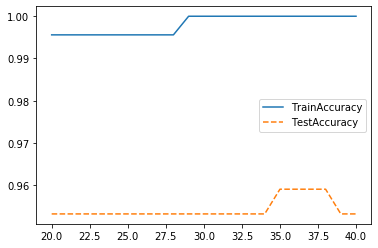

In [63]:
plt.plot(para_n_tree, train_accuracy, linestyle = "-", label="TrainAccuracy")
plt.plot(para_n_tree, test_accuracy, linestyle = "--", label="TestAccuracy")
plt.legend()

<H5> 트리수 변경에 따른 oob모델 변화

In [67]:
oob_error = []
for v_n_estimators in range(1,40):
    rf = RandomForestClassifier(n_estimators=v_n_estimators, oob_score = True, random_state=1234)
    rf.fit(df_train_x,df_train_y)
    oob_error.append(1 - rf.oob_score_)

/home/pirl/anaconda3/envs/NLP_env/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:523: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/home/pirl/anaconda3/envs/NLP_env/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:528: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])
/home/pirl/anaconda3/envs/NLP_env/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:523: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/home/pirl/anaconda3/envs/NLP_env/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:528: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])
/home/pirl/anaconda3/envs/NLP_env/lib/python3.7/site-package

Text(0.5, 0, 'n_estimators')

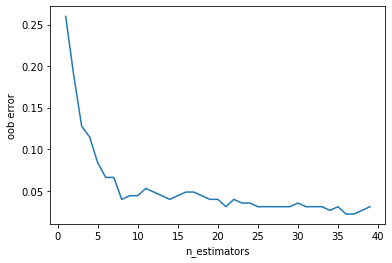

In [68]:
plt.plot(range(1,40),oob_error)
plt.ylabel("oob error")
plt.xlabel("n_estimators")

<h5> parameter - 최대 깊이 조정

In [70]:
train_accuracy = []
test_accuracy = []
para_depth = [depth for depth in range(1,20)]
# split 12이하로 해보기
for v_max_depth in para_depth:
    rf = RandomForestClassifier(random_state=1234,n_estimators = 37,max_depth=v_max_depth)
    rf.fit(df_train_x,df_train_y)
    train_accuracy.append(rf.score(df_train_x,df_train_y))
    test_accuracy.append(rf.score(df_validation_x,df_validation_y))
    
df_accuracy_depth = pd.DataFrame()
df_accuracy_depth["Depth"] = para_depth
df_accuracy_depth["TrainAccuracy"] = train_accuracy
df_accuracy_depth["TestAccuracy"] = test_accuracy
df_accuracy_depth.round(3)



,Depth,TrainAccuracy,TestAccuracy
0,1,0.943,0.947
1,2,0.978,0.942
2,3,0.987,0.953
3,4,0.996,0.959
4,5,0.996,0.959
5,6,1.000,0.959
6,7,1.000,0.959
7,8,1.000,0.959
8,9,1.000,0.959
9,10,1.000,0.959


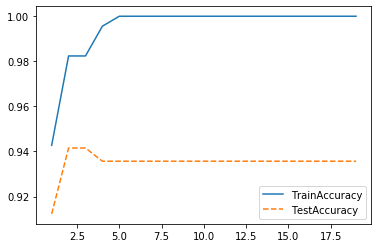

In [37]:
plt.plot(para_depth, train_accuracy, linestyle = "-", label="TrainAccuracy")
plt.plot(para_depth, test_accuracy, linestyle = "--", label="TestAccuracy")
plt.legend()

<H5> parameter - 분리노드의 최소 자료수 조정

In [71]:
train_accuracy = []
test_accuracy = []
para_split = [n_split * 10 for n_split in range(1,11)]

for v_min_samples_split in para_split:
    rf = RandomForestClassifier(random_state=1234,n_estimators=37, max_depth=3, min_samples_split=v_min_samples_split)
    rf.fit(df_train_x,df_train_y)
    train_accuracy.append(rf.score(df_train_x,df_train_y))
    test_accuracy.append(rf.score(df_validation_x,df_validation_y))
    
df_accuracy_split = pd.DataFrame()
df_accuracy_split["MinSamplesSplit"] = para_split
df_accuracy_split["TrainAccuracy"] = train_accuracy
df_accuracy_split["TestAccuracy"] = test_accuracy
df_accuracy_split.round(3)


,MinSamplesSplit,TrainAccuracy,TestAccuracy
0,10,0.987,0.947
1,20,0.982,0.947
2,30,0.982,0.947
3,40,0.982,0.947
4,50,0.982,0.942
5,60,0.974,0.947
6,70,0.974,0.942
7,80,0.974,0.942
8,90,0.974,0.947
9,100,0.974,0.947


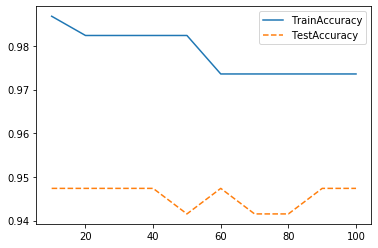

In [72]:
plt.plot(para_split, train_accuracy, linestyle = "-", label="TrainAccuracy")
plt.plot(para_split, test_accuracy, linestyle = "--", label="TestAccuracy")
plt.legend()

In [73]:
train_accuracy = []
test_accuracy = []
para_split = [n_split for n_split in range(30,51)]

for v_min_samples_split in para_split:
    rf = RandomForestClassifier(random_state=1234,n_estimators=37, max_depth=3, min_samples_split=v_min_samples_split)
    rf.fit(df_train_x,df_train_y)
    train_accuracy.append(rf.score(df_train_x,df_train_y))
    test_accuracy.append(rf.score(df_validation_x,df_validation_y))
    
df_accuracy_split = pd.DataFrame()
df_accuracy_split["MinSamplesSplit"] = para_split
df_accuracy_split["TrainAccuracy"] = train_accuracy
df_accuracy_split["TestAccuracy"] = test_accuracy
df_accuracy_split.round(3)


,MinSamplesSplit,TrainAccuracy,TestAccuracy
0,30,0.982,0.947
1,31,0.982,0.947
2,32,0.982,0.947
3,33,0.982,0.947
4,34,0.982,0.947
5,35,0.982,0.947
6,36,0.982,0.947
7,37,0.982,0.947
8,38,0.982,0.947
9,39,0.982,0.947


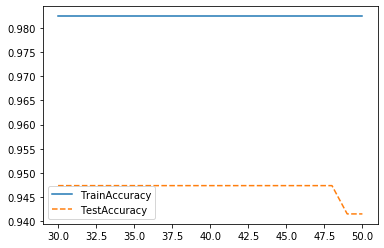

In [74]:
plt.plot(para_split, train_accuracy, linestyle = "-", label="TrainAccuracy")
plt.plot(para_split, test_accuracy, linestyle = "--", label="TestAccuracy")
plt.legend()

<H5> parameter - 리프의 최소 자료 수 조정

In [77]:
train_accuracy = []
test_accuracy = []
para_leaf = [n_leaf for n_leaf in range(1,31)]

for v_min_samples_leaf in para_leaf:
    rf = RandomForestClassifier(random_state=1234, max_depth=3, n_estimators=37,min_samples_split=40,min_samples_leaf=v_min_samples_leaf)
    rf.fit(df_train_x,df_train_y)
    train_accuracy.append(rf.score(df_train_x,df_train_y))
    test_accuracy.append(rf.score(df_validation_x,df_validation_y))
    
df_accuracy_leaf = pd.DataFrame()
df_accuracy_leaf["MinSamplesLeaf"] = para_leaf
df_accuracy_leaf["TrainAccuracy"] = train_accuracy
df_accuracy_leaf["TestAccuracy"] = test_accuracy
df_accuracy_leaf.round(3)

,MinSamplesLeaf,TrainAccuracy,TestAccuracy
0,1,0.982,0.947
1,2,0.982,0.947
2,3,0.982,0.942
3,4,0.982,0.942
4,5,0.982,0.942
5,6,0.982,0.942
6,7,0.978,0.942
7,8,0.978,0.942
8,9,0.974,0.942
9,10,0.974,0.942


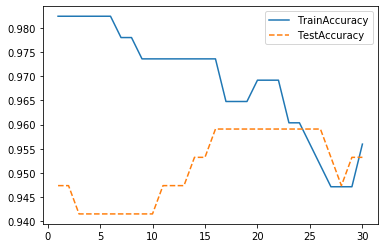

In [78]:
plt.plot(para_leaf, train_accuracy, linestyle = "-", label="TrainAccuracy")
plt.plot(para_leaf, test_accuracy, linestyle = "--", label="TestAccuracy")
plt.legend()

<H5> 최종 모델 선정

In [79]:
# v_feature_name = df_train_x.columns
rf_final = RandomForestClassifier(random_state = 1234,n_estimators=37,min_samples_leaf = 26, min_samples_split = 40, max_depth = 3) 
rf_final.fit(df_train_x, df_train_y)


RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=3, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=26, min_samples_split=40,
                       min_weight_fraction_leaf=0.0, n_estimators=37,
                       n_jobs=None, oob_score=False, random_state=1234,
                       verbose=0, warm_start=False)

<H5> 최종 모델 평가

In [80]:
y_pred = rf_final.predict(df_test_x)
print("Accuracy: {0:.3f}\n".format(rf_final.score(df_test_x,df_test_y)))
print("Confusion matrix: \n{}".format(confusion_matrix(df_test_y,y_pred)))

Accuracy: 0.930

Confusion matrix: 
[[104   1]
 [ 11  55]]


하이퍼 파라미터 조정을 통해 정확도가 92.4%보다 약간 좋아진 93%가 되었습니다.

이는 93%의 정확도로 환자가 유방암인지 아닌지 예측할 수 있다는 말과 같습니다.

confusion matrix는 다음과 같습니다

[[104  1]

[11   55]]

confusion matrix의 해석은 다음과 같습니다.

악성(0)일때 악성이라고 판단한 갯수가 104개이고 악성인데 양성(1)이라고 판단한 갯수가 1개입니다.

또, 실제 양성인데 악성이라 판단한 갯수가 11, 양성일때 양성이라고 판단한 갯수가 55입니다.

confusion matrix를 통해 계산한 정확도는 다음과 같습니다.

(104+55)/(104+1+11+55) = 0.9298 은 약 0.93이라고 할 수 있으며 이는 score함수를 통해 계산한 정확도와 같습니다.

<h5> 설명변수의 중요도 확인

In [81]:
df_importance = pd.DataFrame()
df_importance["Feature"] = v_feature_name
df_importance["Importance"] = rf_final.feature_importances_

df_importance.sort_values("Importance", ascending = False, inplace = True)
df_importance.round(3)

,Feature,Importance
6,mean concavity,0.171
22,worst perimeter,0.164
20,worst radius,0.144
27,worst concave points,0.114
23,worst area,0.065
7,mean concave points,0.057
3,mean area,0.053
2,mean perimeter,0.051
0,mean radius,0.042
26,worst concavity,0.029


Text(0, 0.5, 'Variable')

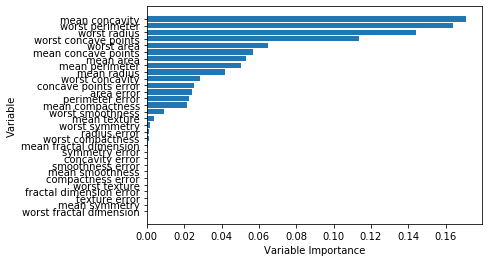

In [82]:
df_importance.sort_values("Importance", ascending = True, inplace = True)
coordinates = range(len(df_importance))
plt.barh(y = coordinates, width = df_importance["Importance"])
plt.yticks(coordinates, df_importance["Feature"])
plt.xlabel("Variable Importance")
plt.ylabel("Variable")

변수 중요도를 보면 의사결정 나무와는 다르게 더 많은 변수들이 사용된 것을 알 수 있습니다. 

의사결정나무 모델의 정확도가 91.8%이고 랜덤 포레스트 모델의 정확도가 93%입니다. 

의사결정나무 모델에서 worst concave points변수가 0.887의 중요도를 가지고 있고 랜덤 포레스트는 가장 큰 중요도를 가진 mean concavity변수가 0.171의 중요도를 가지고 있습니다.

좀 더 여러가지 변수를 복합적으로 고려한 랜덤 포레스트 모델의 정확도가 더 높은 이유도 이 때문일거라 생각합니다.

따라서 저는 유방암 분류 문제는 랜덤 포레스트 모델을 사용할 것입니다.